### __Data Overview__

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\lakshita rawat\Downloads\Jupyter_files\cleaned_procressed_file_2.csv")
df.head()

,Months,Year,No. of Banks live on UPI,Count of UPI transactions (In Mn),Total Amount of UPI transactions (In Mn)
0,April,2016,21,0,0
1,May,2016,21,0,0
2,June,2016,21,0,0
3,July,2016,21,0,0
4,August,2016,21,0,3


 *We begin by examining the basic structure of the dataset, how many rows and columns it has, what types of variables are included, and whether the data spans the entire timeline from 2016 to 2025. This helps us confirm that the dataset aligns with our analysis objectives*

In [4]:
print(df.shape) #total rows and columns
print()

print(df.columns)
print()

print(df.isnull().sum())
print()

print(df.duplicated().sum())
print()

print(df.describe())
print()

print(df.info())

(108, 5)

Index(['Months', 'Year', 'No. of Banks live on UPI',
       'Count of UPI transactions (In Mn)',
       'Total Amount of UPI transactions (In Mn)                              '],
      dtype='object')

Months                                                                    0
Year                                                                      0
No. of Banks live on UPI                                                  0
Count of UPI transactions (In Mn)                                         0
Total Amount of UPI transactions (In Mn)                                  0
dtype: int64

0

              Year  No. of Banks live on UPI  \
count   108.000000                108.000000   
mean   2020.250000                253.787037   
std       2.630252                194.049134   
min    2016.000000                 21.000000   
25%    2018.000000                113.000000   
50%    2020.000000                181.500000   
75%    2022.250000                382.750000   
max    

#### __Univariate Analysis__ 
*Analyzing each variable independently to understand its distribution. Monthly and yearly transaction counts and values (in Millions) are examined to assess their scale, variation, and any deviations from typical patterns*

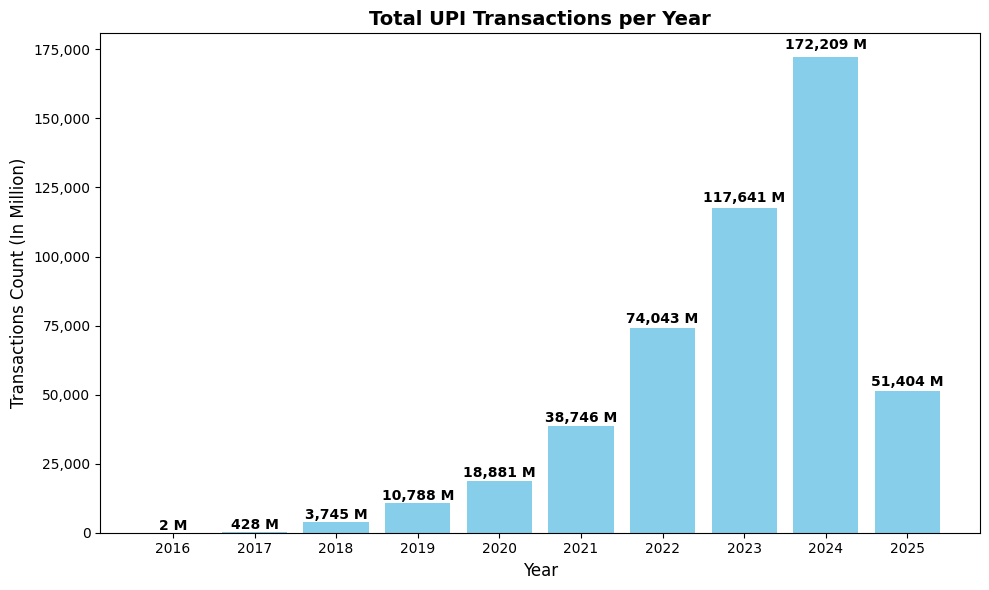

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

yearly_txn = df.groupby("Year")["Count of UPI transactions (In Mn)"].sum().reset_index()
all_years = pd.DataFrame({"Year": range(int(yearly_txn["Year"].min()), int(yearly_txn["Year"].max()) + 1)})
yearly_txn = all_years.merge(yearly_txn, on="Year", how="left").fillna(0)
yearly_txn["Count of UPI transactions (In Mn)"] = yearly_txn["Count of UPI transactions (In Mn)"].astype(int)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(yearly_txn["Year"], yearly_txn["Count of UPI transactions (In Mn)"], color="skyblue")

# Show all years on x-axis
plt.xticks(yearly_txn["Year"])  

plt.title("Total UPI Transactions per Year", fontsize=14, weight="bold")
plt.xlabel("Year", fontsize=12)

# Make it clear on y-axis
plt.ylabel("Transactions Count (In Million)", fontsize=12)

# Format y-axis ticks with commas for readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Show values on top of bars with 'Million'
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (yval*0.01 + 10),  # shift a little above the bar
             f"{yval:,} M", ha="center", va="bottom", fontsize=10, weight="bold")

plt.tight_layout()
plt.show()



In [ ]:
df.rename(columns={"Count transactions (In Mn)": "Count of UPI transactions (In Mn)"}, inplace=True)

df.columns = df.columns.str.strip()  # remove spaces
print(df.columns)

yearly_txn = df.groupby("Year")[[
    "Total Amount of UPI transactions (In Mn)",
    "Count of UPI transactions (In Mn)"
]].sum().reset_index()

Index(['Months', 'Year', 'No. of Banks live on UPI',
       'Count of UPI transactions (In Mn)',
       'Total Amount of UPI transactions (In Mn)'],
      dtype='object')


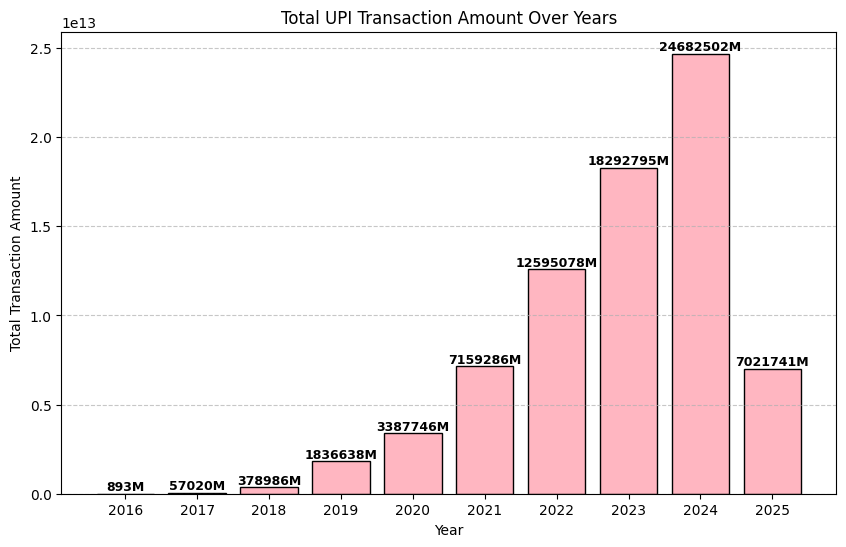

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022,2023,2024,2025],
    "Total Amount of UPI transactions (In Mn)": [893, 57020, 378986, 1836638, 3387746, 7159286, 12595078,18292795,24682502,7021741]
}
df = pd.DataFrame(data)

# ✅ Convert into absolute values
df["Total Amount of UPI transactions (In Mn)"] = df["Total Amount of UPI transactions (In Mn)"] * 1_000_000

# Plot as bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(df["Year"], df["Total Amount of UPI transactions (In Mn)"], color="lightpink", edgecolor="black")

# Add labels above bars
for bar, amount in zip(bars, df["Total Amount of UPI transactions (In Mn)"]):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height(), 
             f"{amount/1_000_000:.0f}M",   # shows in millions
             ha="center", va="bottom", fontsize=9, fontweight="bold")


# ✅ Show all years from 2016 to 2025
plt.xticks(range(2016, 2026))
plt.title("Total UPI Transaction Amount Over Years")
plt.xlabel("Year")
plt.ylabel("Total Transaction Amount")
plt.xticks(df["Year"])  # keep years continuous
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### __*Examining the data to find out the highest year of UPI Adoption*__

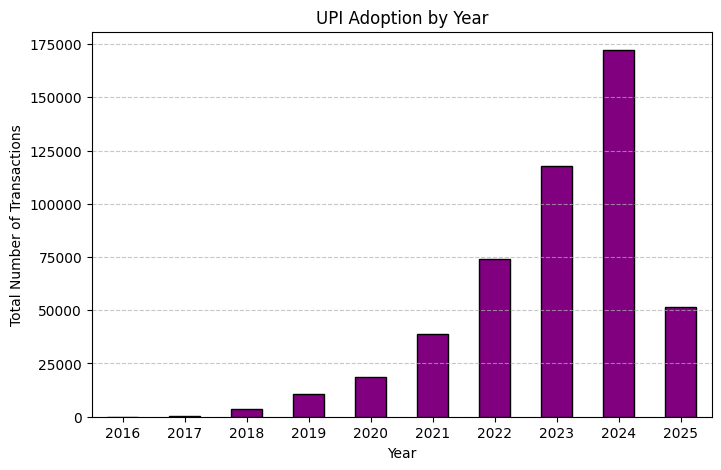

Highest UPI adoption occurred in the year: 2024


In [36]:
import matplotlib.pyplot as plt

# Group by year and calculate total transactions
yearly_adoption = df.groupby("Year")["Count of UPI transactions (In Mn)"].sum()

# Plot
plt.figure(figsize=(8,5))
yearly_adoption.plot(kind="bar", color="purple", edgecolor="black")

plt.title("UPI Adoption by Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Transactions")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print year with highest adoption
highest_year = yearly_adoption.idxmax()
print(f"Highest UPI adoption occurred in the year: {highest_year}")


##### __*Reviewing the data to highlight the month where UPI adoption is maximum*__

C:\Users\lakshita rawat\AppData\Local\Temp\ipykernel_8748\1749965698.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_adoption = df.groupby("Months")["Count of UPI transactions (In Mn)"].sum()


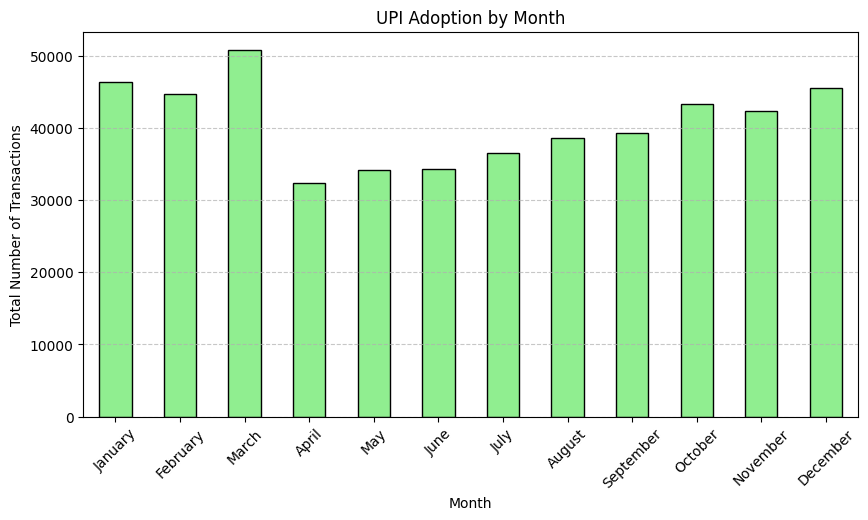

Highest UPI adoption occurred in the month: March


In [38]:
# Group by month and calculate total transactions
monthly_adoption = df.groupby("Months")["Count of UPI transactions (In Mn)"].sum()

# Reorder by month order
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
monthly_adoption = monthly_adoption.reindex(month_order)

# Plot
plt.figure(figsize=(10,5))
monthly_adoption.plot(kind="bar", color="lightgreen", edgecolor="black")

plt.title("UPI Adoption by Month")
plt.xlabel("Month")
plt.ylabel("Total Number of Transactions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print month with highest adoption
highest_month = monthly_adoption.idxmax()
print(f"Highest UPI adoption occurred in the month: {highest_month}")


*To explore **seasonality** in UPI transactions, let's examine whether certain months, particularly festive periods, consistently witness higher activity compared to others. This analysis aims to reveal how seasonal trends shape digital payment behavior also suggests that external shocks, like the pandemic, can temporarily disrupt usage but also strengthen long-term adoption trends*

C:\Users\lakshita rawat\AppData\Local\Temp\ipykernel_8748\558070324.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_value = df.pivot_table(


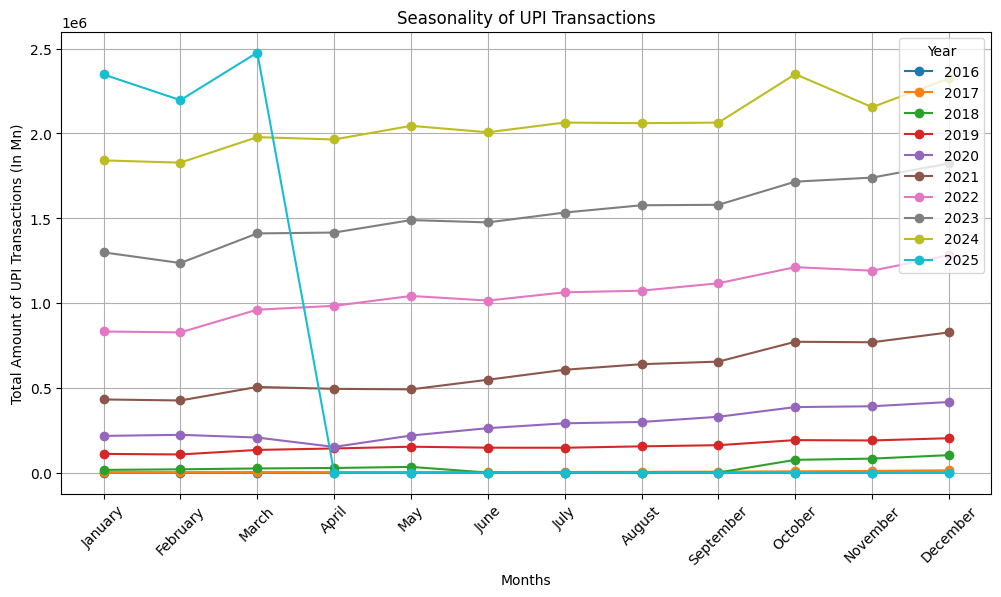

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Ensure df is loaded ---
try:
    df
except NameError:
    raise ValueError("DataFrame 'df' is not defined. Please load your dataset first.")

# --- Clean column names just in case ---
df.columns = df.columns.str.strip()

# Define month order
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

# --- Validate required columns ---
required_cols = ["Months", "Year", "Total Amount of UPI transactions (In Mn)"]
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Convert Months column into ordered categorical
df["Months"] = pd.Categorical(df["Months"], categories=month_order, ordered=True)

# Pivot table
pivot_value = df.pivot_table(
    index="Months",
    columns="Year",
    values="Total Amount of UPI transactions (In Mn)",
    aggfunc="sum"
).reindex(month_order)

# --- Plot ---
plt.figure(figsize=(12,6))
for year in pivot_value.columns:
    plt.plot(pivot_value.index, pivot_value[year], marker='o', label=year)

plt.title("Seasonality of UPI Transactions")
plt.xlabel("Months")
plt.ylabel("Total Amount of UPI Transactions (In Mn)")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.grid(True)
plt.show()


##### From this seasonality graph we can get the following insights-
 * __Consistent Year by Year Growth__- UPI transactions have shown a strong upward trajectory, with each year recording higher volumes than the previous one. This reflects the rapid adoption of digital payments and the increasing trust in UPI as a preferred mode of transaction.

 * __Seasonal Peaks During Festive Months__- A noticeable surge in transaction volumes is observed during the October–December period, which aligns with major Indian festivals __(Diwali, Dussehra, Christmas)__ and year-end shopping. This indicates that festive seasons play a significant role in boosting digital payments.

 * __Impact of COVID-19 (2020–21)__-A significant dip is visible during the early months of the COVID-19 pandemic in 2020, coinciding with strict lockdown measures and reduced economic activity (durimg March). However, this was followed by a sharp recovery (from April), as consumers shifted rapidly towards contactless and cashless modes of payment.

 * __Stable Mid-Year Activity__- The months between __April and August__ typically show steady transaction levels without extreme spikes, suggesting routine usage dominated by day-to-day payments rather than seasonal spending.

 * __Lower Transactions in February__- February consistently records lower transaction volumes compared to other months. This is primarily due to its shorter duration, but it also highlights how the number of days in a month directly influences the total transaction volume.

#### __Bivariate Analysis__
*In this analysis of two variables together takes place  to understand how one influences the other. This helps us see relationships, patterns, or dependencies, the result is a clearer picture of correlations and drivers, showing whether growth is seasonal, infrastructure-led, or usage-led*

#### *__Comparing growth in Transaction Count with the Transaction Value (Overall trend of UPI transactions from 2016 to 2025)__*

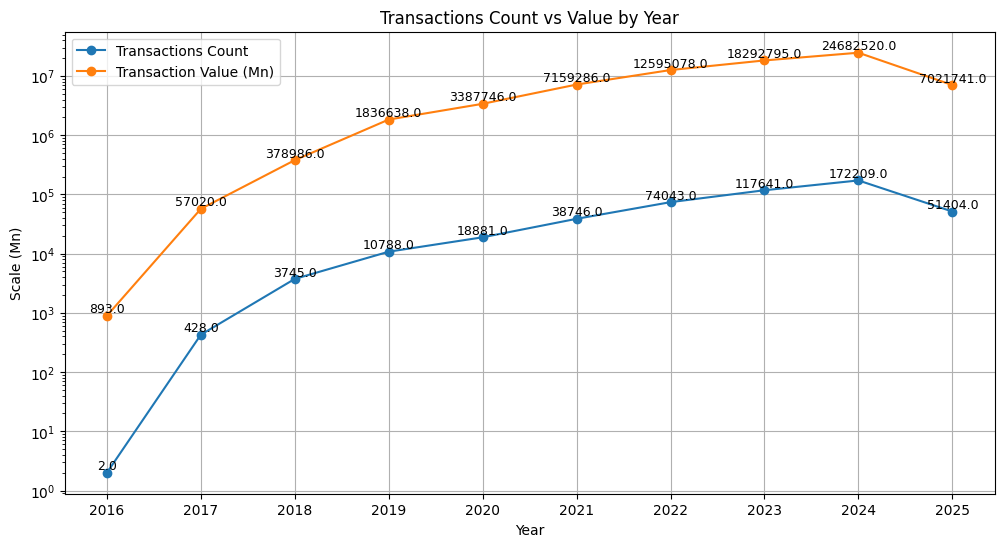

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming your df is already defined

# Create a complete range of years
years = np.arange(2016, 2026)

# Group by Year and sum the values
grouped = df.groupby("Year").agg({
    "Count of UPI transactions (In Mn)": "sum",
    "Total Amount of UPI transactions (In Mn)": "sum"
}).reindex(years, fill_value=0)  # Fill missing years with 0

plt.figure(figsize=(12,6))

# Plot transactions count
plt.plot(grouped.index, grouped["Count of UPI transactions (In Mn)"], 
         label="Transactions Count", marker='o')

# Plot transaction value
plt.plot(grouped.index, grouped["Total Amount of UPI transactions (In Mn)"], 
         label="Transaction Value (Mn)", marker='o')

# Annotate points
for x, y in zip(grouped.index, grouped["Count of UPI transactions (In Mn)"]):
    plt.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=9)

for x, y in zip(grouped.index, grouped["Total Amount of UPI transactions (In Mn)"]):
    plt.text(x, y, f"{y:.1f}", ha='center', va='bottom', fontsize=9)

plt.title("Transactions Count vs Value by Year")
plt.xlabel("Year")
plt.ylabel("Scale (Mn)")

plt.xticks(years)  # Ensure all years are shown on X-axis
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()



##### *Insights from the graph*-
In the beginning: - slow adoption (2016–2017), later years: rapid adoption (2021–2024) therefore the relationship is directly proportional but non-linear,and as the value grows faster than count thus growth is value-led, meaning larger transactions are increasingly driving UPI usage.



#### __*Impact of Live Banks on Transaction Growth*__

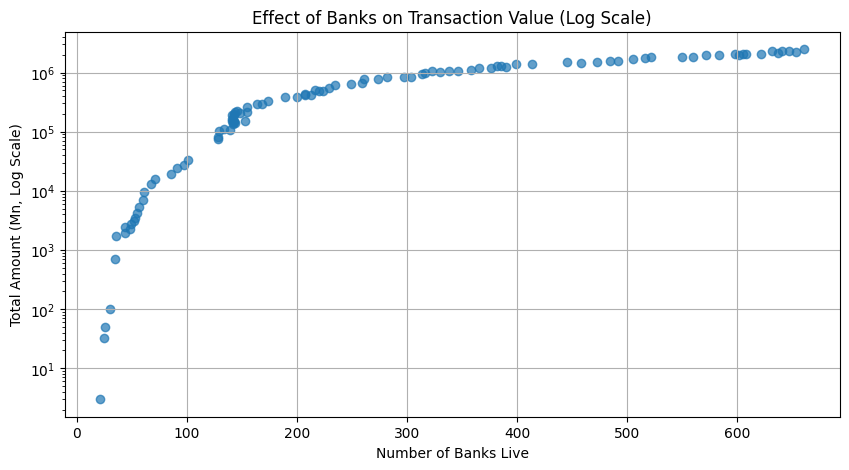

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df["No. of Banks live on UPI"], df["Total Amount of UPI transactions (In Mn)"], alpha=0.7)
plt.yscale("log")   # log scale for better visibility
plt.title("Effect of Banks on Transaction Value (Log Scale)")
plt.xlabel("Number of Banks Live")
plt.ylabel("Total Amount (Mn, Log Scale)")
plt.grid(True)
plt.show()

##### *Insights from the graph*- 
The number of banks going live on UPI had a huge initial effect on transaction growth, but over time, the effect became diminishing. This means UPI adoption is no longer just about more banks joining it’s now about growth is driven more by user adoption and transaction habits, not just by adding banks.

#### __*Interpreting the influence of months on transaction counts or values*__

C:\Users\lakshita rawat\AppData\Local\Temp\ipykernel_4268\4087693079.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby("Months").agg({


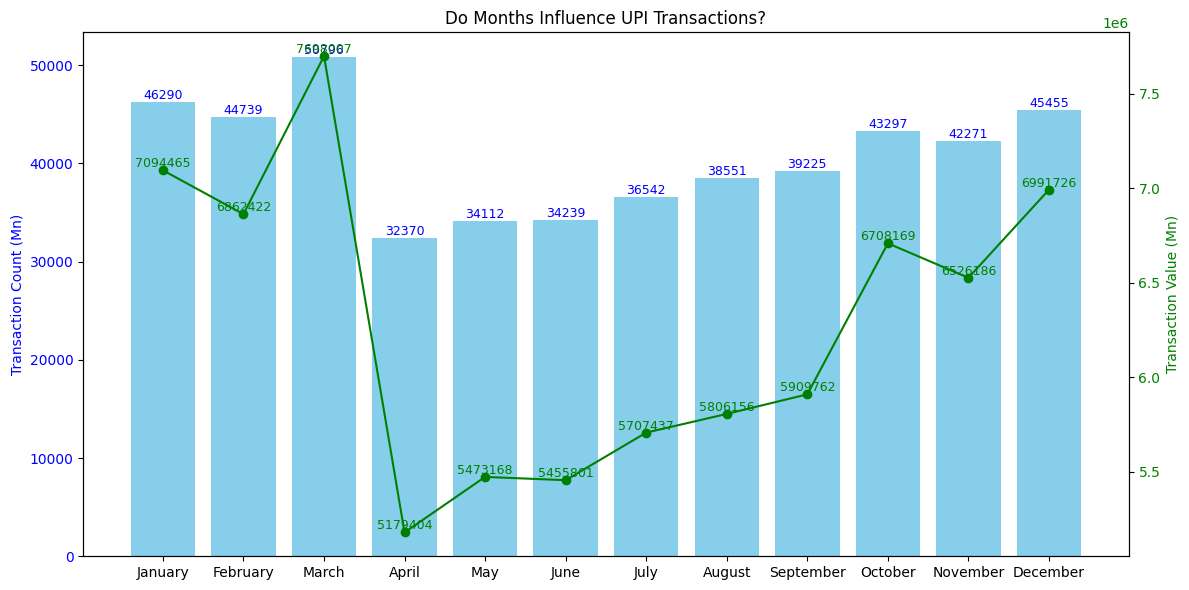

In [64]:
import matplotlib.pyplot as plt

# Group by Month
monthly = df.groupby("Months").agg({
    "Count of UPI transactions (In Mn)": "sum",
    "Total Amount of UPI transactions (In Mn)": "sum"
})

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot for transaction count
bars = ax1.bar(monthly.index, monthly["Count of UPI transactions (In Mn)"], 
               color="skyblue", label="Transaction Count")
ax1.set_ylabel("Transaction Count (Mn)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.0f}", 
             ha='center', va='bottom', fontsize=9, color="blue")

# Line plot for transaction value on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly["Total Amount of UPI transactions (In Mn)"], 
         color="green", marker="o", label="Transaction Value")
ax2.set_ylabel("Transaction Value (Mn)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Annotate line points with values
for x, y in zip(monthly.index, monthly["Total Amount of UPI transactions (In Mn)"]):
    ax2.text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=9, color="green")

plt.title("Do Months Influence UPI Transactions?")
fig.tight_layout()
plt.show()

##### *Insights from the graph*
The graph shows that UPI transactions vary across months. __March__ records the highest spike in both transaction count and value due to fiscal year-end settlements. This is followed by a sharp drop in __April__ as activity normalizes. From __May to September__, transactions remain steady, while __October to December__ show a gradual rise driven by the festive season. Overall, transaction count and value are __directly proportional__, with value rising more sharply than counts, indicating __higher-value payments during peak months.__



#### __*Let's see over the years, is transaction growth linked more to usage (count) or value per transaction?*__

posx and posy should be finite values
posx and posy should be finite values


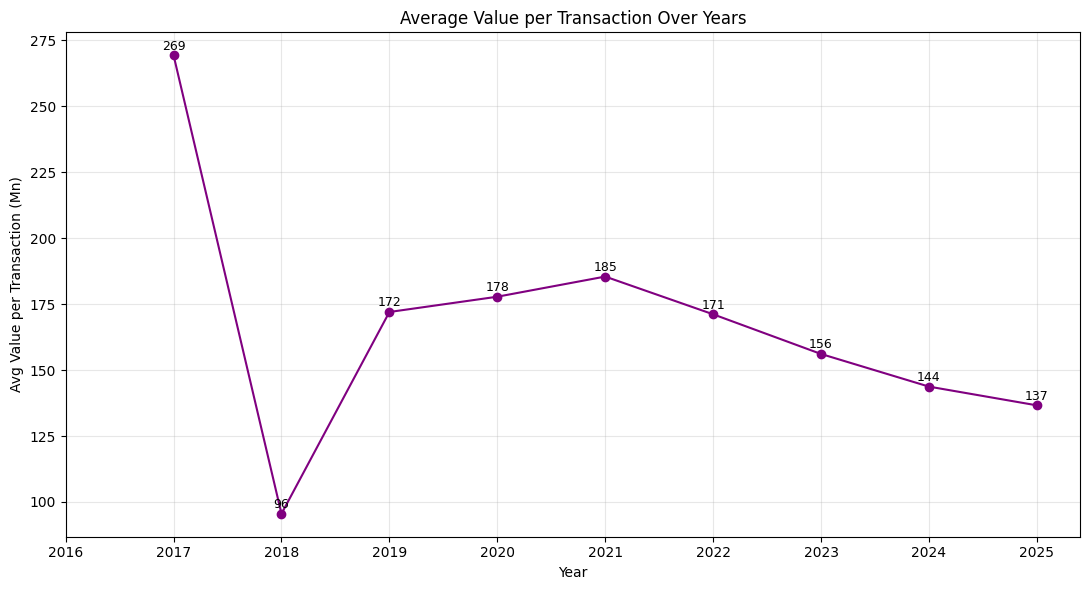

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure numeric columns
df["Total Amount of UPI transactions (In Mn)"] = pd.to_numeric(
    df["Total Amount of UPI transactions (In Mn)"], errors="coerce"
)
df["Count of UPI transactions (In Mn)"] = pd.to_numeric(
    df["Count of UPI transactions (In Mn)"], errors="coerce"
)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Avg value per transaction
df["Avg_Value_per_Transaction"] = (
    df["Total Amount of UPI transactions (In Mn)"] / df["Count of UPI transactions (In Mn)"]
)

# Group and make the x-axis continuous
years = pd.Index(range(2016, 2025 + 1), name="Year")
yearly_avg = df.groupby("Year")["Avg_Value_per_Transaction"].mean().reindex(years)

plt.figure(figsize=(11,6))
plt.plot(yearly_avg.index, yearly_avg.values, marker="o",color="purple")
plt.title("Average Value per Transaction Over Years")
plt.xlabel("Year")
plt.ylabel("Avg Value per Transaction (Mn)")
plt.xticks(years)
plt.grid(True, alpha=0.3)

# Safe annotations: drop NaNs, compute a relative offset
ymax = np.nanmax(yearly_avg.values)
offset = 0.02 * ymax if np.isfinite(ymax) else 1.0

for x, y in yearly_avg.dropna().items():   # (x=year, y=value)
    y = float(y)
    plt.text(x, y + offset, f"{y:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()



##### *Insights from the graph*
* In the early years, growth was usage-driven (more people, small payments).
* In the later years, growth is also value-driven (larger average ticket size).
* This shows a dual effect: UPI is no longer just for everyday payments but also for larger financial transactions, making value an equally important driver in recent years.

#### __*Correlation Analysis of UPI Dataset*__

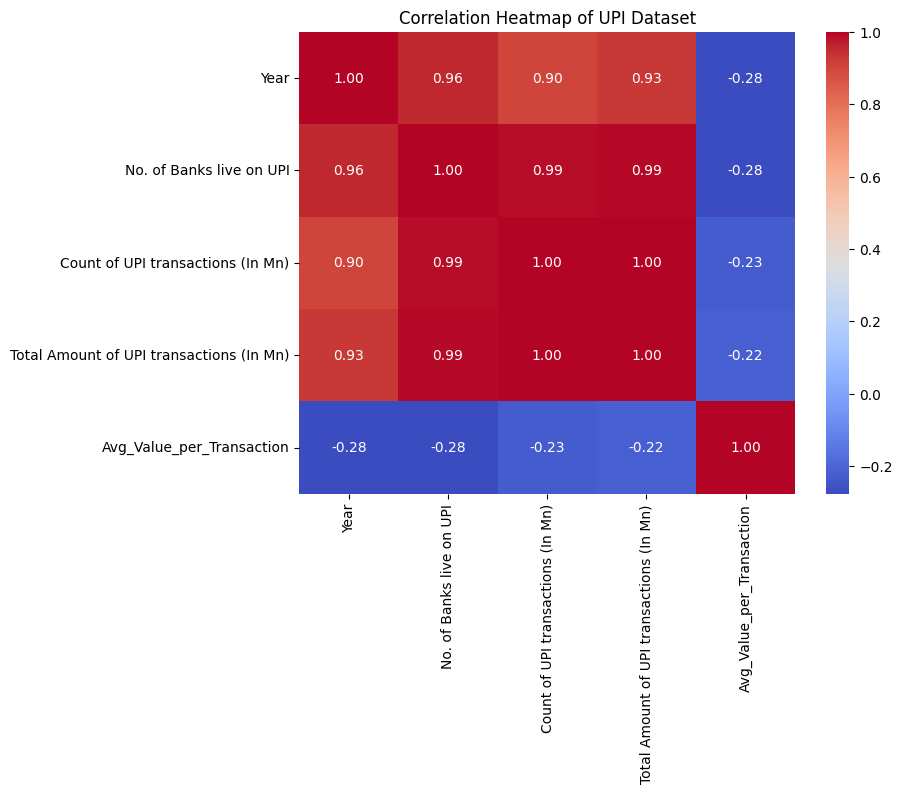

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of UPI Dataset")
plt.show()
